In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/thesis/FinalWork/F_demo3.csv')
#from utils import hello




#Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
import pandas as pd

import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/MyDrive/thesis/FinalWork/' 
#stopword='/content/drive/MyDrive/thesis/myworkonthis/newwork/bangla_stopwords.txt'
#stopwords_list = path+'bangla_stopwords.txt'
stopwords_list= pd.read_csv('/content/drive/MyDrive/thesis/FinalWork/bangla_stopwords.txt', sep=" ")
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Dataset Preparation

In [ ]:
# Read the data and take only 1000 Reviews
#data = pd.read_excel(path+'news_comments_12000.xlsx')
#data = pd.read_excel(path+'F_demo.xlsx')
data = pd.read_csv(path+'F_demo3.csv')
print("Total Reviews:",len(data),
      "\nTotal harmful Reviews:",len(data[data.Catagori =='Harm']),
      "\nTotal spamming Reviews:",len(data[data.Catagori=='Spam']),
      "\nTotal Normal Reviews:",len(data[data.Catagori=='Normal']),
      #"\nTotal Very Negative Reviews:",len(data[data.Catagori=='Very Negative']),
      #"\nTotal Negative Reviews:",len(data[data.Catagori=='Negative'])

      )

Total Reviews: 3621 
Total harmful Reviews: 1408 
Total spamming Reviews: 1062 
Total Normal Reviews: 1150


In [ ]:
"""
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
Harm = dataset[dataset['CatagoriId'] == 0 ]
Spam = dataset[dataset['CatagoriId'] == 1 ]
Normal = dataset[dataset['CatagoriId'] == 2]
#sport = dataset[dataset['CatagoriId'] == 3]
#entertainment = dataset[dataset['CatagoriId'] == 4]
count = [Harm['CatagoriId'].count(), Spam['CatagoriId'].count(), Normal['CatagoriId'].count()]
pie = plt.pie(count, labels = ['Harm', 'Spam', 'Normal'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

              """

'\nfig = plt.figure(figsize = (5,5))\ncolors = ["skyblue"]\nHarm = dataset[dataset[\'CatagoriId\'] == 0 ]\nSpam = dataset[dataset[\'CatagoriId\'] == 1 ]\nNormal = dataset[dataset[\'CatagoriId\'] == 2]\n#sport = dataset[dataset[\'CatagoriId\'] == 3]\n#entertainment = dataset[dataset[\'CatagoriId\'] == 4]\ncount = [Harm[\'CatagoriId\'].count(), Spam[\'CatagoriId\'].count(), Normal[\'CatagoriId\'].count()]\npie = plt.pie(count, labels = [\'Harm\', \'Spam\', \'Normal\'],\n              autopct = "%1.1f%%",\n              shadow = True,\n              colors = colors,\n              startangle = 45,\n              explode = (0.05, 0.05, 0.05, 0.05,0.05))\n\n              '

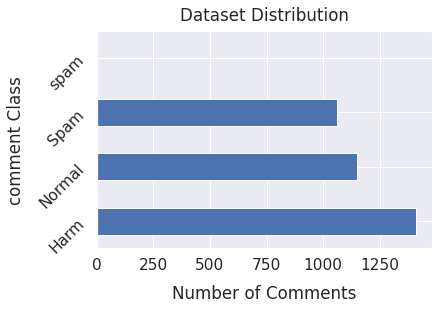

In [ ]:
sns.set(font_scale=1.4)
data['Catagori'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("comment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
# print some unprocessed reviews
sample_data = [ 6,10,15,18,20,25,40,49,60,66,68,70,80]
for i in sample_data:
      print(data.Comment[i],'\n','catagory:-- ',data.Catagori[i],'\n')  

আমি সম্পূর্ণ সুস্থ আছি।  
 catagory:--  Normal 

বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরামর্শ দিলেন অনলাইন রাজনীতি বিশেষজ্ঞরা 
 catagory:--  Spam 

একজন বাংলাদেশী হিসেবে আমি গর্বিত আর বালকাতার পরাধীন ভিখারি বাঙ্গালীরা কি বুঝবে স্বাধীনতার কি মূল্য।তোরা দিল্লির চামচামি কর নয়ত ভারতবর্ষ থেকে তুদেরকে লাথি মেরে বাহির করে দিবে....! 
 catagory:--  Harm 

বালের দল ,বালের সুখবর,.আরে ভাই সমস্যা ছিল ত এদের বোলিং আকশনের।।শোধরে নিয়েছে আলহামদুলিল্লাহ,কবে চিল্লাচিল্লি করা থামাবেন বলেন ত??দেশ কবে সভ্য হবে?? 
 catagory:--  Harm 

এখন সবই বৈধ গাধার বাচ্চারা  ,যখন আবার কোন বড় টুর্নামেন্টে ভারতের সাথে বাংলাদেশের খেলা পরবে তখন আবার রাতারাতি সব অবৈধ হয়ে যাবে । 
 catagory:--  Harm 

আমরা যতটুকু Cricket কে ভালবাসি...,তার কিঞ্চিত্ পরিমাণ যদি দেশ ও দেশের মানুষকে ভালবাসতাম,,,তাহলে আমরা অনেক দূর এগিয়ে যেতাম,,,সিমান্ত এলাকায় ভারতের বিড়াল রা একের পর এক সাধারণ জনগণকে অকারণে খুন করছে,,,আমাদের সেই দিক নিয়ে মাথাব্যতা নাই...আমারা আছি...,,,, ঘোড়ার ডিম নিয়া!!!!!আজব 
 catagory:--  Harm 

তুই তো মাহিয়া মাহির ভাতার হওয়া

#Data Cleaning

In [ ]:
# Data cleaning function
# Text preprocessing 
def process_comments(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation  
    """
    comment = comment.str.lower()
    comment = comment.str.replace(r"\#", "" )
    comment = comment.str.replace(r'http\S+', "URL")
    comment = comment.str.replace(r"@", "")
    comment = comment.str.replace(r"[^A-Za-z0-9()!?\'\`\"]"," ")
    comment = comment.str.replace("\s{2,}"," ")
    """
    return comment


  

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [6,10,15,18,20,25,40,49,60,66,68,70,80]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','catagory:-- ',data.Catagori[i],'\n')

Original:
 আমি সম্পূর্ণ সুস্থ আছি।  
Cleaned:
 আমি সম্পূর্ণ সুস্থ আছি   
 catagory:--  Normal 

Original:
 বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরামর্শ দিলেন অনলাইন রাজনীতি বিশেষজ্ঞরা 
Cleaned:
 বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরামর্শ দিলেন অনলাইন রাজনীতি বিশেষজ্ঞরা 
 catagory:--  Spam 

Original:
 একজন বাংলাদেশী হিসেবে আমি গর্বিত আর বালকাতার পরাধীন ভিখারি বাঙ্গালীরা কি বুঝবে স্বাধীনতার কি মূল্য।তোরা দিল্লির চামচামি কর নয়ত ভারতবর্ষ থেকে তুদেরকে লাথি মেরে বাহির করে দিবে....! 
Cleaned:
 একজন বাংলাদেশী হিসেবে আমি গর্বিত আর বালকাতার পরাধীন ভিখারি বাঙ্গালীরা কি বুঝবে স্বাধীনতার কি মূল্য তোরা দিল্লির চামচামি কর নয়ত ভারতবর্ষ থেকে তুদেরকে লাথি মেরে বাহির করে দিবে      
 catagory:--  Harm 

Original:
 বালের দল ,বালের সুখবর,.আরে ভাই সমস্যা ছিল ত এদের বোলিং আকশনের।।শোধরে নিয়েছে আলহামদুলিল্লাহ,কবে চিল্লাচিল্লি করা থামাবেন বলেন ত??দেশ কবে সভ্য হবে?? 
Cleaned:
 বালের দল  বালের সুখবর  আরে ভাই সমস্যা ছিল ত এদের বোলিং আকশনের  শোধরে নিয়েছে আলহামদুলিল্লাহ কবে চিল্লাচিল্লি করা থামাবেন বলে

**Tokenization**

In [ ]:
"""
#Tokenization

import re
def tokenize(txt):
    tokens=re.split('\Ww',txt)
    return tokens

data['cleaned_comment_tokenized'] = data['cleaned'].apply(lambda x: tokenize))

data.head(5)

"""
"""
#pip install bnlp_toolkit
from bnlp import NLTKTokenizer

bnltk = NLTKTokenizer()

text = data['cleaned']

word_tokens = bnltk.word_tokenize(text)
#sentence_tokens = bnltk.sentence_tokenize(text)
print(word_tokens)
#print(sentence_tokens)

"""
"""
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = data.cleaned

tokenizer = Tokenizer(num_words = 100000000000000)
tokenizer.num_words


tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(word_index)
"""

'\nfrom tensorflow.keras.preprocessing.text import Tokenizer\n\nsentences = data.cleaned\n\ntokenizer = Tokenizer(num_words = 100000000000000)\ntokenizer.num_words\n\n\ntokenizer.fit_on_texts(sentences)\n\nword_index = tokenizer.word_index\nprint(word_index)\n'

In [ ]:
"""
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

df.review = df.review.apply(remove_stopwords)
df.review[1]
"""

"""
def remove_stopwords(cleaned):
  #stop_words = set(stopwords.words('english'))
  stop_words = stopwords_list
  #words = word_tokenize(data['cleaned'])
  words = word_tokenize(cleaned)
  return [x for x in words if x not in stop_words]

data.cleaned = data.cleaned.apply(remove_stopwords)
data.cleaned[1]

"""


"\ndef remove_stopwords(cleaned):\n  #stop_words = set(stopwords.words('english'))\n  stop_words = stopwords_list\n  #words = word_tokenize(data['cleaned'])\n  words = word_tokenize(cleaned)\n  return [x for x in words if x not in stop_words]\n\ndata.cleaned = data.cleaned.apply(remove_stopwords)\ndata.cleaned[1]\n\n"

**Remove Stop words**

In [ ]:
"""
import nltk
#stopwords = nltk.corpus.stopwords.words('english')
#stopwords[0:10]
stopwords = stopwords_list
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

data['comment_ns'] = data['cleaned_comment_tokenized'].apply(lambda x: remove_stopwords(x))  

data.head()
"""


"\nimport nltk\n#stopwords = nltk.corpus.stopwords.words('english')\n#stopwords[0:10]\nstopwords = stopwords_list\ndef remove_stopwords(txt_tokenized):\n    txt_clean = [word for word in txt_tokenized if word not in stopwords]\n    return txt_clean\n\ndata['comment_ns'] = data['cleaned_comment_tokenized'].apply(lambda x: remove_stopwords(x))  \n\ndata.head()\n"

##Remove Low lenght data

In [ ]:

# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 1 Small Reviews 
Total Reviews: 3620


#Dataset Summary

In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Catagori.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Catagori==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Catagori==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nCatagori Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Catagori==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)  



Catagori Name :  Harm
Number of Documents:1408
Number of Words:30533
Number of Unique Words:8069
Most Frequent Words:

না	601
করে	341
কি	295
আর	239
এই	225
যে	187
বিশ্বাস	184
তো	149
কে	142
ও	141

Catagori Name :  Normal
Number of Documents:1150
Number of Words:15261
Number of Unique Words:5169
Most Frequent Words:

না	226
করে	142
আল্লাহ	113
কি	111
ও	110
আপনার	105
আর	103
এই	102
জন্য	87
ভাই	85

Catagori Name :  Spam
Number of Documents:1062
Number of Words:9616
Number of Unique Words:4308
Most Frequent Words:

মতিকণ্ঠ	151
দৈনিক	150
না	112
যে	65
করে	59
এক	44
ও	43
থেকে	42
এই	42
কি	40
Total Number of Unique Words:13385


#Dataset Summary Visualization

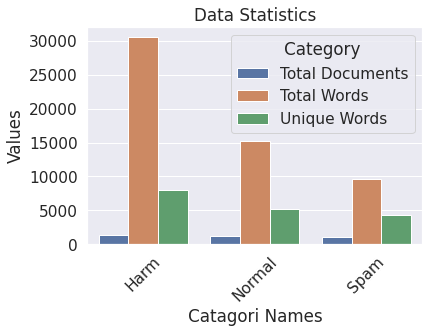

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Catagori Names':class_names})
df = pd.melt(data_matrix, id_vars="Catagori Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Catagori Names', y='Values' ,hue='Category')
ax.set_xlabel('Catagori Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

#Comment Lenght Distribution

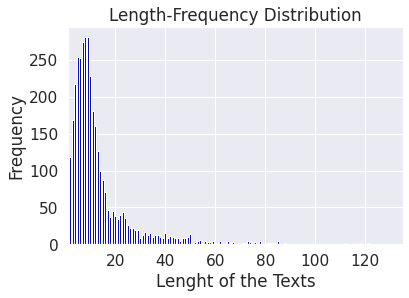

Maximum Length of a review: 216
Minimum Length of a review: 1
Average Length of a reviews: 15.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

**LabelEncoding**

In [ ]:
d=data.Comment

**Catagori Labaling Or Encoding**

In [ ]:
#def label_encoding(Catagori,bool):
    
le = LabelEncoder()
le.fit(data.Catagori)
encoded_labels = le.transform(data.Catagori)
labels = np.array(encoded_labels) # Converting into numpy array
class_names =le.classes_ ## Define the class names again
"""
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nCatagori Names:-->",le.classes_)
        for i in sample_data:
            print(Catagori[i],' ', encoded_labels[i],'\n')

    #return labels
"""
print(labels)

[0 2 1 ... 2 2 3]


In [ ]:
# import pandas as pd 
import pandas as pd 
#Word Tokenization
import nltk # import package for tokenization
#nltk.download('punkt') # download all spporting function /files for NLTK package
from nltk.tokenize import word_tokenize
data['cleaned_wt'] = [word_tokenize(i) for i in data['cleaned']]
data.head(5)

,Catagori,Comment,CatagoriId,cleaned,length,cleaned_wt
0,Harm,কাংলুরা এবার লুঙ্গি তুলে নাচতে থাকবে মনে হবে ও...,0,কাংলুরা এবার লুঙ্গি তুলে নাচতে থাকবে মনে হবে ও...,14,"[কাংলুরা, এবার, লুঙ্গি, তুলে, নাচতে, থাকবে, মন..."
1,Spam,বিশ্বের পবিত্র ৭ গাছের তালিকায় রয়েছে গাঁজা!,1,বিশ্বের পবিত্র ৭ গাছের তালিকায় রয়েছে গাঁজা,7,"[বিশ্বের, পবিত্র, ৭, গাছের, তালিকায়, রয়েছে, ..."
2,Normal,"আমার দৃঢ় বিশ্বাস, সরকারের রায়কে সকলে মেনে নি...",2,আমার দৃঢ় বিশ্বাস সরকারের রায়কে সকলে মেনে নি...,15,"[আমার, দৃঢ়, বিশ্বাস, সরকারের, রায়কে, সকলে, মেন..."
3,Spam,মাশরাফি নমিনেশন পেলে লেংটা হয়ে দৌড়ানোর প্রতি...,1,মাশরাফি নমিনেশন পেলে লেংটা হয়ে দৌড়ানোর প্রতি...,10,"[মাশরাফি, নমিনেশন, পেলে, লেংটা, হয়ে, দৌড়ানোর..."
4,Harm,পড়ন্ত বিকালে খুবিয়ানদের চোখে দেখেছি কুয়েটিয়ানদ...,0,পড়ন্ত বিকালে খুবিয়ানদের চোখে দেখেছি কুয়েটিয়ানদ...,11,"[পড়ন্ত, বিকালে, খুবিয়ানদের, চোখে, দেখেছি, কুয়ে..."


In [ ]:
import nltk
#stopwords = nltk.corpus.stopwords.words('english')
#stopwords[0:10]
stopwords = stopwords_list
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

data['cleaned_ns'] = data['cleaned_wt'].apply(lambda x: remove_stopwords(x))  

data.head()


,Catagori,Comment,CatagoriId,cleaned,length,cleaned_wt,cleaned_ns
0,Harm,কাংলুরা এবার লুঙ্গি তুলে নাচতে থাকবে মনে হবে ও...,0,কাংলুরা এবার লুঙ্গি তুলে নাচতে থাকবে মনে হবে ও...,14,"[কাংলুরা, এবার, লুঙ্গি, তুলে, নাচতে, থাকবে, মন...","[কাংলুরা, এবার, লুঙ্গি, তুলে, নাচতে, থাকবে, মন..."
1,Spam,বিশ্বের পবিত্র ৭ গাছের তালিকায় রয়েছে গাঁজা!,1,বিশ্বের পবিত্র ৭ গাছের তালিকায় রয়েছে গাঁজা,7,"[বিশ্বের, পবিত্র, ৭, গাছের, তালিকায়, রয়েছে, ...","[বিশ্বের, পবিত্র, ৭, গাছের, তালিকায়, রয়েছে, ..."
2,Normal,"আমার দৃঢ় বিশ্বাস, সরকারের রায়কে সকলে মেনে নি...",2,আমার দৃঢ় বিশ্বাস সরকারের রায়কে সকলে মেনে নি...,15,"[আমার, দৃঢ়, বিশ্বাস, সরকারের, রায়কে, সকলে, মেন...","[আমার, দৃঢ়, বিশ্বাস, সরকারের, রায়কে, সকলে, মেন..."
3,Spam,মাশরাফি নমিনেশন পেলে লেংটা হয়ে দৌড়ানোর প্রতি...,1,মাশরাফি নমিনেশন পেলে লেংটা হয়ে দৌড়ানোর প্রতি...,10,"[মাশরাফি, নমিনেশন, পেলে, লেংটা, হয়ে, দৌড়ানোর...","[মাশরাফি, নমিনেশন, পেলে, লেংটা, হয়ে, দৌড়ানোর..."
4,Harm,পড়ন্ত বিকালে খুবিয়ানদের চোখে দেখেছি কুয়েটিয়ানদ...,0,পড়ন্ত বিকালে খুবিয়ানদের চোখে দেখেছি কুয়েটিয়ানদ...,11,"[পড়ন্ত, বিকালে, খুবিয়ানদের, চোখে, দেখেছি, কুয়ে...","[পড়ন্ত, বিকালে, খুবিয়ানদের, চোখে, দেখেছি, কুয়ে..."


In [ ]:
data['cln']= data['cleaned_ns'].apply(lambda x: ' '.join(x))

In [ ]:
data.head()


,Catagori,Comment,CatagoriId,cleaned,length,cleaned_wt,cleaned_ns,cln
0,Harm,কাংলুরা এবার লুঙ্গি তুলে নাচতে থাকবে মনে হবে ও...,0,কাংলুরা এবার লুঙ্গি তুলে নাচতে থাকবে মনে হবে ও...,14,"[কাংলুরা, এবার, লুঙ্গি, তুলে, নাচতে, থাকবে, মন...","[কাংলুরা, এবার, লুঙ্গি, তুলে, নাচতে, থাকবে, মন...",কাংলুরা এবার লুঙ্গি তুলে নাচতে থাকবে মনে হবে ও...
1,Spam,বিশ্বের পবিত্র ৭ গাছের তালিকায় রয়েছে গাঁজা!,1,বিশ্বের পবিত্র ৭ গাছের তালিকায় রয়েছে গাঁজা,7,"[বিশ্বের, পবিত্র, ৭, গাছের, তালিকায়, রয়েছে, ...","[বিশ্বের, পবিত্র, ৭, গাছের, তালিকায়, রয়েছে, ...",বিশ্বের পবিত্র ৭ গাছের তালিকায় রয়েছে গাঁজা
2,Normal,"আমার দৃঢ় বিশ্বাস, সরকারের রায়কে সকলে মেনে নি...",2,আমার দৃঢ় বিশ্বাস সরকারের রায়কে সকলে মেনে নি...,15,"[আমার, দৃঢ়, বিশ্বাস, সরকারের, রায়কে, সকলে, মেন...","[আমার, দৃঢ়, বিশ্বাস, সরকারের, রায়কে, সকলে, মেন...",আমার দৃঢ় বিশ্বাস সরকারের রায়কে সকলে মেনে নিবে ...
3,Spam,মাশরাফি নমিনেশন পেলে লেংটা হয়ে দৌড়ানোর প্রতি...,1,মাশরাফি নমিনেশন পেলে লেংটা হয়ে দৌড়ানোর প্রতি...,10,"[মাশরাফি, নমিনেশন, পেলে, লেংটা, হয়ে, দৌড়ানোর...","[মাশরাফি, নমিনেশন, পেলে, লেংটা, হয়ে, দৌড়ানোর...",মাশরাফি নমিনেশন পেলে লেংটা হয়ে দৌড়ানোর প্রতি...
4,Harm,পড়ন্ত বিকালে খুবিয়ানদের চোখে দেখেছি কুয়েটিয়ানদ...,0,পড়ন্ত বিকালে খুবিয়ানদের চোখে দেখেছি কুয়েটিয়ানদ...,11,"[পড়ন্ত, বিকালে, খুবিয়ানদের, চোখে, দেখেছি, কুয়ে...","[পড়ন্ত, বিকালে, খুবিয়ানদের, চোখে, দেখেছি, কুয়ে...",পড়ন্ত বিকালে খুবিয়ানদের চোখে দেখেছি কুয়েটিয়ানদ...


**Feature Extraction**

In [ ]:
#B = dataset['cleaned']
B = data['cln']
#C = dataset['CatagoriId']
C = labels

In [ ]:

tfidf=TfidfVectorizer(analyzer='word',max_features=100000000000, )  #ngram_range=(1,3) , tokenizer=lambda x: x.split()
X=tfidf.fit_transform(data['cln'])
X.shape,C.shape

count_array = X.toarray()
df = pd.DataFrame(data=count_array,columns = tfidf.get_feature_names())
print(df)


       অই  অইখ  অইগ  অইড  অইব  অইল  অওক  ...  ৱকম   ৱজ   ৱত   ৱয়   ৷ক  ৷৷৷  ৷৷৷৷
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...
3616  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0
3617  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0
3618  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0
3619  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0
3620  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0

[3621 rows x 2222 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
type(count_array)

numpy.ndarray

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#x = np.array(dataset.iloc[:,0].values)
#y = np.array(dataset.CatagoriId.values)
y = np.array(labels)
cv = CountVectorizer(max_features = 5000000, tokenizer=lambda x: x.split() ) #ngram_range=(1,3), tokenizer=lambda x: x.split()

x1 = cv.fit_transform(data.cln)
print("X.shape = ",x1.shape)
print("y.shape = ",y.shape)

count_array2 = x1.toarray()
df1 = pd.DataFrame(data=count_array2,columns = cv.get_feature_names())
print(df1)

X.shape =  (3621, 13384)
y.shape =  (3621,)
      ঃ  অ  অংকার  অংকে  অংগ  অংশ  অংশগ্রহণ  ...  ৯০  ৯৫  ৯৬  ৯৯  ৱকম  ৷  ৷কারন
0     0  0      0     0    0    0         0  ...   0   0   0   0    0  0      0
1     0  0      0     0    0    0         0  ...   0   0   0   0    0  0      0
2     0  0      0     0    0    0         0  ...   0   0   0   0    0  0      0
3     0  0      0     0    0    0         0  ...   0   0   0   0    0  0      0
4     0  0      0     0    0    0         0  ...   0   0   0   0    0  0      0
...  .. ..    ...   ...  ...  ...       ...  ...  ..  ..  ..  ..  ... ..    ...
3616  0  0      0     0    0    0         0  ...   0   0   0   0    0  0      0
3617  0  0      0     0    0    0         0  ...   0   0   0   0    0  0      0
3618  0  0      0     0    0    0         0  ...   0   0   0   0    0  0      0
3619  0  0      0     0    0    0         0  ...   0   0   0   0    0  0      0
3620  0  0      0     0    0    0         0  ...   0   0   0   0    0  0    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
m = np.concatenate((count_array,count_array2), axis=1)

In [ ]:
type(m)

numpy.ndarray

In [ ]:
m
m.shape

(3621, 15606)

In [ ]:
"""
from pyparsing import results
df1.to_csv('df1.csv', index=False,encoding='utf-8-sig')
!cat df1.csv

"""


"\nfrom pyparsing import results\ndf1.to_csv('df1.csv', index=False,encoding='utf-8-sig')\n!cat df1.csv\n\n"

In [ ]:
"""
# We will try the same model again, now with n-gram= 1,1
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_ng= CountVectorizer(ngram_range=(1,1))

ng1= vectorizer_ng.fit_transform(data.cln) #.toarray()


print("X.shape = ",ng1.shape)
print("y.shape = ",y.shape)

count_array = ng1.toarray()
dfOfng1 = pd.DataFrame(data=count_array,columns = vectorizer_ng.get_feature_names())
print(dfOfng1)

"""

'\n# We will try the same model again, now with n-gram= 1,1\nfrom sklearn.feature_extraction.text import CountVectorizer\nvectorizer_ng= CountVectorizer(ngram_range=(1,1))\n\nng1= vectorizer_ng.fit_transform(data.cln) #.toarray()\n\n\nprint("X.shape = ",ng1.shape)\nprint("y.shape = ",y.shape)\n\ncount_array = ng1.toarray()\ndfOfng1 = pd.DataFrame(data=count_array,columns = vectorizer_ng.get_feature_names())\nprint(dfOfng1)\n\n'

In [ ]:
"""
# save as a pickle of ng
import pickle
filename2 = 'ng.sav'
pickle.dump(x2, open(filename2, 'wb'))


# load the pickle of cv from disk
loaded_model3 = pickle.load(open(filename2, 'rb'))
loaded_model3
"""

"\n# save as a pickle of ng\nimport pickle\nfilename2 = 'ng.sav'\npickle.dump(x2, open(filename2, 'wb'))\n\n\n# load the pickle of cv from disk\nloaded_model3 = pickle.load(open(filename2, 'rb'))\nloaded_model3\n"

In [ ]:
# We will try the same model again, now with n-gram= 1,2
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_ng= CountVectorizer(ngram_range=(1,2))

ng2= vectorizer_ng.fit_transform(data.cln) #.toarray()

print("X.shape = ",ng2.shape)
print("y.shape = ",y.shape)

count_array3 = ng2.toarray()
dfOfng2 = pd.DataFrame(data=count_array3,columns = vectorizer_ng.get_feature_names())
print(dfOfng2)



X.shape =  (3621, 20745)
y.shape =  (3621,)
      অই  অই উজ  অই কথ  অই কন  অই করব  ...  ৷ক  ৷ক রন  ৷৷৷  ৷৷৷ এৱ  ৷৷৷৷
0      0      0      0      0       0  ...   0      0    0       0     0
1      0      0      0      0       0  ...   0      0    0       0     0
2      0      0      0      0       0  ...   0      0    0       0     0
3      0      0      0      0       0  ...   0      0    0       0     0
4      0      0      0      0       0  ...   0      0    0       0     0
...   ..    ...    ...    ...     ...  ...  ..    ...  ...     ...   ...
3616   0      0      0      0       0  ...   0      0    0       0     0
3617   0      0      0      0       0  ...   0      0    0       0     0
3618   0      0      0      0       0  ...   0      0    0       0     0
3619   0      0      0      0       0  ...   0      0    0       0     0
3620   0      0      0      0       0  ...   0      0    0       0     0

[3621 rows x 20745 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Final= np.concatenate((count_array3,m),axis=1)

In [ ]:
Final

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Final.shape

(3621, 36351)

In [ ]:
"""
from pyparsing import results
dfOfng2.to_csv('dfOfng2.csv', index=False,encoding='utf-8-sig')
!cat dfOfng2.csv
"""

"\nfrom pyparsing import results\ndfOfng2.to_csv('dfOfng2.csv', index=False,encoding='utf-8-sig')\n!cat dfOfng2.csv\n"

In [ ]:
"""
# We will try the same model again, now with n-gram= 1,3
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_ng= CountVectorizer(ngram_range=(1,3))

ng3= vectorizer_ng.fit_transform(data.cln) #.toarray()


print("X.shape = ",ng3.shape)
print("y.shape = ",y.shape)

count_array = ng3.toarray()
dfOfng3 = pd.DataFrame(data=count_array,columns = vectorizer_ng.get_feature_names())
print(dfOfng3)

"""

'\n# We will try the same model again, now with n-gram= 1,3\nfrom sklearn.feature_extraction.text import CountVectorizer\nvectorizer_ng= CountVectorizer(ngram_range=(1,3))\n\nng3= vectorizer_ng.fit_transform(data.cln) #.toarray()\n\n\nprint("X.shape = ",ng3.shape)\nprint("y.shape = ",y.shape)\n\ncount_array = ng3.toarray()\ndfOfng3 = pd.DataFrame(data=count_array,columns = vectorizer_ng.get_feature_names())\nprint(dfOfng3)\n\n'

In [ ]:
"""

from pyparsing import results
dfOfng3.to_csv('dfOfng3.csv', index=False,encoding='utf-8-sig') #encoding='utf-8-sig'
!cat dfOfng3.csv

"""

"\n\nfrom pyparsing import results\ndfOfng3.to_csv('dfOfng3.csv', index=False,encoding='utf-8-sig') #encoding='utf-8-sig'\n!cat dfOfng3.csv\n\n"

In [ ]:
"""
data1=pd.read_csv('/content/df.csv', header=None) 
data1
"""
"""
data2=pd.read_csv('/content/df1.csv', header=None) 
data2
"""
"""
data3=pd.read_csv('/content/dfOfng1.csv', header=None) 
data3
"""
"""
dd1= pd.concat((data1,data2,data3), ignore_index=True)
dd1.shape
dd1.head()

"""
"""
data4=pd.read_csv('/content/dfOfng2.csv', header=None) 
data4
"""
"""
dd= pd.concat((data1,data2,data3,data4), ignore_index=True)
dd.shape
dd.head()

"""



'\ndd= pd.concat((data1,data2,data3,data4), ignore_index=True)\ndd.shape\ndd.head()\n\n'

In [ ]:
"""
import pandas
#import glob as global
from glob import glob
#data_files=sorted(glob('data/data*.csv')) /content/drive/MyDrive/thesis/FinalWork/d

data_files=sorted(glob('/content/drive/MyDrive/thesis/FinalWork/d/*.csv'))
#data_files=sorted(glob('data1,data2,data3'))
data_files


mergeddata=pd.concat(glob(pd.read_csv(datafiles) for datafiles in data_files))

"""

"\nimport pandas\n#import glob as global\nfrom glob import glob\n#data_files=sorted(glob('data/data*.csv')) /content/drive/MyDrive/thesis/FinalWork/d\n\ndata_files=sorted(glob('/content/drive/MyDrive/thesis/FinalWork/d/*.csv'))\n#data_files=sorted(glob('data1,data2,data3'))\ndata_files\n\n\nmergeddata=pd.concat(glob(pd.read_csv(datafiles) for datafiles in data_files))\n\n"

In [ ]:
"""
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
#y = np.array(dataset.CatagoriId.values)
y = np.array(labels)
cv = CountVectorizer(max_features = 5000000000, ngram_range=(1,2), tokenizer=lambda x: x.split()) #ngram_range=(1,3), tokenizer=lambda x: x.split()
#cv = CountVectorizer(stop_words=stopwords_list)
#x1 = cv.fit_transform(dataset.cleaned).toarray()
x1 = cv.fit_transform(data.cln).toarray()
print("X.shape = ",x1.shape)
print("y.shape = ",y.shape)
"""


'\nfrom sklearn.feature_extraction.text import CountVectorizer\nx = np.array(dataset.iloc[:,0].values)\n#y = np.array(dataset.CatagoriId.values)\ny = np.array(labels)\ncv = CountVectorizer(max_features = 5000000000, ngram_range=(1,2), tokenizer=lambda x: x.split()) #ngram_range=(1,3), tokenizer=lambda x: x.split()\n#cv = CountVectorizer(stop_words=stopwords_list)\n#x1 = cv.fit_transform(dataset.cleaned).toarray()\nx1 = cv.fit_transform(data.cln).toarray()\nprint("X.shape = ",x1.shape)\nprint("y.shape = ",y.shape)\n'

In [ ]:
"""
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(x1)
X.shape

"""


'\nfrom sklearn.feature_extraction.text import TfidfTransformer\ntfidf_transformer = TfidfTransformer()\nX = tfidf_transformer.fit_transform(x1)\nX.shape\n\n'

In [ ]:
"""
tfidf=TfidfVectorizer(analyzer='word',max_features=100000000000, ngram_range=(1,3), tokenizer=lambda x: x.split() )
X=tfidf.fit_transform(data['cleaned'])
X.shape,C.shape

"""

"\ntfidf=TfidfVectorizer(analyzer='word',max_features=100000000000, ngram_range=(1,3), tokenizer=lambda x: x.split() )\nX=tfidf.fit_transform(data['cleaned'])\nX.shape,C.shape\n\n"

In [ ]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0,shuffle = True )
print(len(x_train))
print(len(x_test))

"""


'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0,shuffle = True )\nprint(len(x_train))\nprint(len(x_test))\n\n'

In [ ]:
from scipy import sparse
X1 = sparse.csr_matrix(Final)


In [ ]:
X1

<3621x36351 sparse matrix of type '<class 'numpy.float64'>'
	with 133810 stored elements in Compressed Sparse Row format>

In [ ]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =25,shuffle = True ) #shuffle = True
#print(len(X_train))
#print(len(X_test))

"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.1, random_state =25,shuffle = True ) #shuffle = True
#print(len(X_train))
#print(len(X_test))

# **MultinomialNB**

In [ ]:
# Import multinomialNB
from sklearn.naive_bayes import MultinomialNB
# create MultinomialNB object
clf= MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
# Train clf
clf.fit(X_train, y_train)
# Compute accuracy on test set
accuracy= clf.score(X_test, y_test)

accuracy = round(accuracy * 100,2)
print("The accuracy of the classifier is %.3f" %  accuracy)

The accuracy of the classifier is 74.930


In [ ]:
"""
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(X_train, y_train)
classifier
y_pred = classifier.predict(X_test)



#y_pred1 = tfidf.transform(['আমি সম্পূর্ণ সুস্থ আছি। '])
y_pred1 = cv.transform(['আর্মষ্ট্রং এর প্রতি মরনোত্তর ক্ষোভ প্রকাশ করলেন ইউনূস | দৈনিক মতিকণ্ঠ। '])
#y_pred1 = tfidf.transform(['ডিপজল ‍আর নেই দেখুন ভিডিও'])

yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Harm"
elif yy == [2]:
  result = "Spam"
elif yy == [1]:
  result = "Normal"
print(result)

"""

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confussion matrix
[[104  23   2]
 [ 28  94   7]
 [ 10  14  81]]


Accuracy of Logistic Regression: 76.85950413223141 

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       129
           1       0.72      0.73      0.72       129
           2       0.90      0.77      0.83       105

    accuracy                           0.77       363
   macro avg       0.78      0.77      0.77       363
weighted avg       0.78      0.77      0.77       363

confussion matrix
[[109  14   0   6]
 [ 31  84   7   7]
 [ 15  19  70   1]
 [  0   0   0   0]]


Accuracy of Random Forest: 72.45179063360881 

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       129
           1       0.72      0.65      0.68       129
           2       0.91      0.67      0.77       105
           3       0.00      0.00      0.00         0

    accuracy                           0.72       363
   macro avg       0.58      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

confussion matrix
[[85 22 15  7]
 [35 65 20  9]
 [18 11 70  6]
 [ 0  0  0  0]]


Accuracy of DecisionTreeClassifier: 60.60606060606061 

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       129
           1       0.66      0.50      0.57       129
           2       0.67      0.67      0.67       105
           3       0.00      0.00      0.00         0

    accuracy                           0.61       363
   macro avg       0.49      0.46      0.47       363
weighted avg       0.65      0.61      0.62       363



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confussion matrix
[[108  20   1]
 [ 32  90   7]
 [ 11  13  81]]


Accuracy of Support Vector Classifier: 76.85950413223141 

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       129
           1       0.73      0.70      0.71       129
           2       0.91      0.77      0.84       105

    accuracy                           0.77       363
   macro avg       0.79      0.77      0.77       363
weighted avg       0.78      0.77      0.77       363



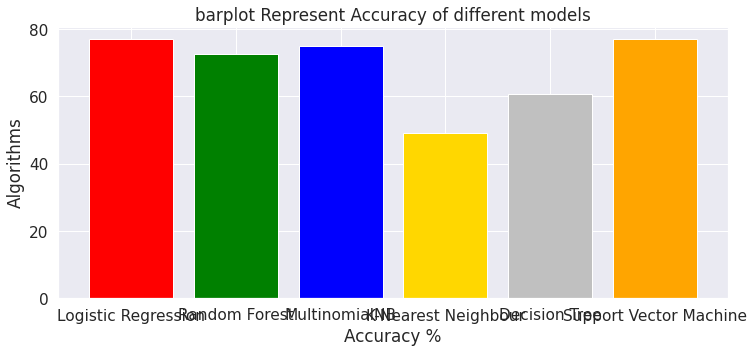

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
"""
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
"""

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=100, random_state=10,max_depth=1000)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

m4 = 'MultinomialNB'
mnb = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
mnb.fit(X_train, y_train)
mnb_predicted = mnb.predict(X_test)
mnb_conf_matrix = confusion_matrix(y_test, mnb_predicted)
mnb_acc_score = accuracy_score(y_test, mnb_predicted)
print("confussion matrix")
print(mnb_conf_matrix)
print("\n")
print("Accuracy of MultinomialNB:",mnb_acc_score*100,'\n')
print(classification_report(y_test,mnb_predicted))


m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=110,max_depth = 100000)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

# Accuracy Metrics
"""
#lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
#nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
mnb_false_positive_rate,mnb_true_positive_rate,mnb_threshold = roc_curve(y_test,mnb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
"""
"""
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
#plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(mnb_false_positive_rate,mnb_true_positive_rate,label='MultinomialNB')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()
"""
# Model Evaluation
"""
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

"""
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','MultinomialNB',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,rf_acc_score*100,mnb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

colors = ['red','green','blue','gold','silver','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()


In [ ]:
"""
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','MultinomialNB',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,rf_acc_score*100,mnb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev
"""
#create list of model and accuracy dicts
perform_list = [ ]

model_performance = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','MultinomialNB',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,rf_acc_score*100,mnb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
#model_performance = model_ev[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Accuracy
0,Logistic Regression,76.859504
1,Random Forest,72.451791
2,MultinomialNB,74.931129
3,K-Nearest Neighbour,49.035813
4,Decision Tree,60.606061
5,Support Vector Machine,76.859504


In [ ]:
model = model_performance["Model"]
max_value = model_performance["Accuracy"].max()
print("The best accuracy of model is", max_value,"from LR and SVM")

The best accuracy of model is 76.85950413223141 from LR and SVM
